In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression

In [34]:
# how standardized test scores, GPA, and other factors affect college enrollment

# Factors to consider, Parent salary, Average grades, type of school and Gender

# Plan: Use logistic regression to determine which factor has the highest correlation

col_interest = pd.read_csv('levelOfInterestInCollege.csv')
col_interest

# Convert the will_go_to_college column to ones and zeros, ones=True zero=False

col_interest['will_go_to_college'] = col_interest['will_go_to_college'].apply(lambda x: 1 if x else 0)
col_interest

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,1
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,1


0.28
0.92
85.57499999999999
92% of students with an average grade higher than 85.57 went to college
Only 28% of students with an average grade below 85.57 went to college


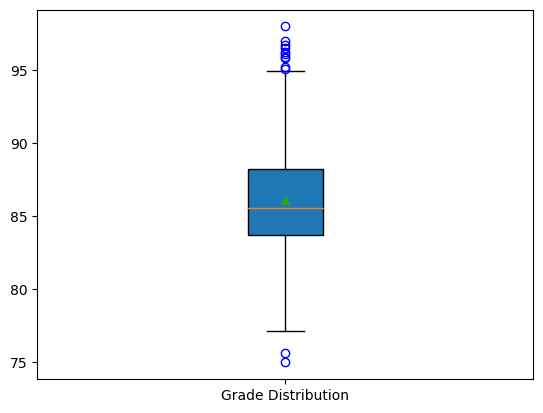

In [75]:
# Question: Is there some correlation between higher average grade and going to college

# Seperate the data into quartiles and find the frequency of each portion

avg_grades = col_interest['average_grades']
will_college = col_interest['will_go_to_college']


avg_grade_median = col_interest['average_grades'].median()

avg_q1 = col_interest.loc[avg_grades < avg_grades.quantile(0.25)]
avg_q3 = col_interest.loc[avg_grades > avg_grades.quantile(0.75)]
print(avg_q1['will_go_to_college'].sum() / len(avg_q1['will_go_to_college']))
print(avg_q3['will_go_to_college'].sum() / len(avg_q3['will_go_to_college']))
print(avg_grade_median)

plt.boxplot(avg_grades, showmeans=True, labels=['Grade Distribution'], patch_artist=True, flierprops=dict(color='blue', markeredgecolor='blue'))

print("92% of students with an average grade higher than 85.57 went to college")
print("Only 28% of students with an average grade below 85.57 went to college")

In [36]:
# Sentiment and discussion of scores 
# Does positive sentiment lead to more admissions